# Data Preprocessing Template

## Importing the libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [168]:
df= pd.read_csv('spam.csv',encoding='latin-1')

In [169]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# New Section

# New Section

In [170]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [171]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [172]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['v1']= lb.fit_transform(df['v1'])

In [173]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [174]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

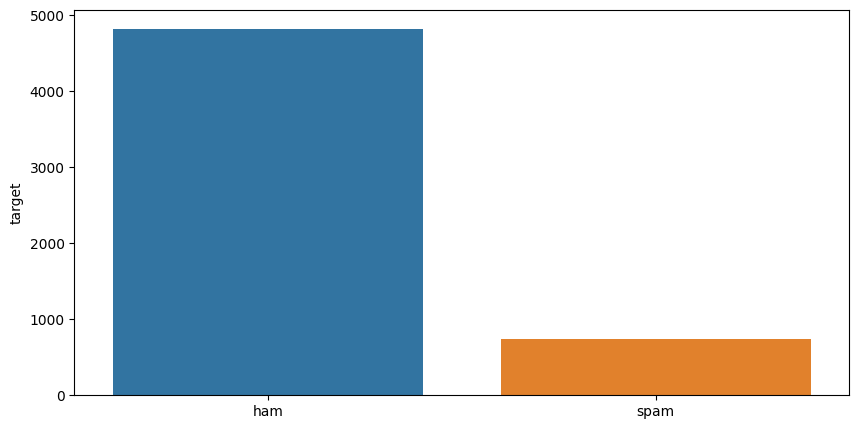

In [175]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=lb.inverse_transform(df['target'].unique()),y=df['target'].value_counts());

In [176]:
import nltk
print(nltk.data.path)
nltk.download('stopwords')
nltk.download('punkt')

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [177]:
df['num_char'] = df['text'].apply(lambda x:len(x))

In [178]:
df['num_world'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [179]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [180]:
df

,target,text,num_char,num_world,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [181]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

In [182]:
len(stopwords_list)

179

In [183]:
import string
string.punctuation
def transform_format(str):
    str = str.lower()
    str = nltk.word_tokenize(str)
    y=[]
    for i in str:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " ".join(y)

In [184]:
transform_format('helllo my name is tukaram and ! not to say')

'helllo name tukaram say'

In [185]:
df['summary_text'] = df['text'].apply(transform_format)

<ipython-input-186-db93604bff16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


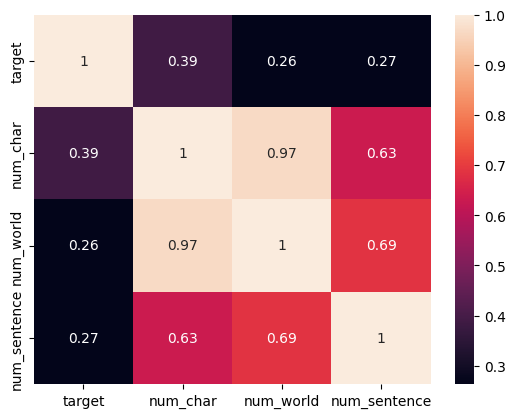

In [186]:
sns.heatmap(df.corr(),annot=True);

In [187]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=400,min_font_size=10,background_color='white')

In [188]:
spam_wc= wc.generate(df[df['target']==1]['summary_text'].str.cat(sep=" "))

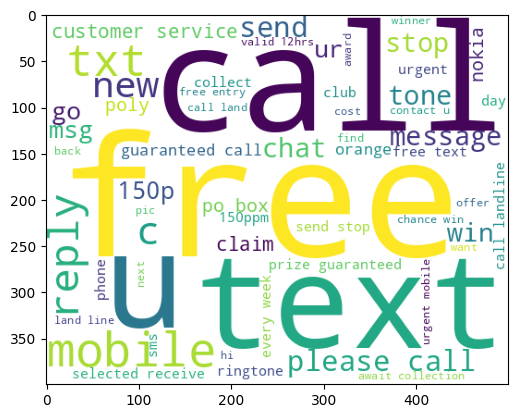

In [189]:
plt.imshow(spam_wc)

In [190]:
ham_wc= wc.generate(df[df['target']==0]['summary_text'].str.cat(sep=" "))

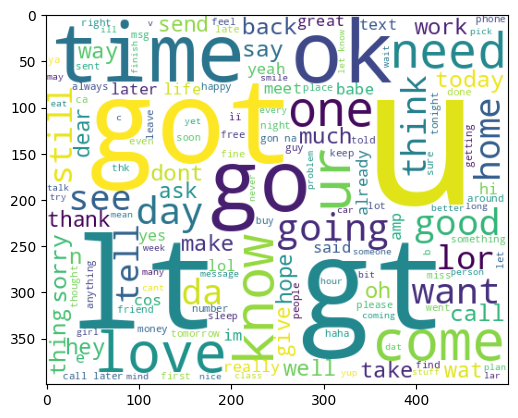

In [191]:
plt.imshow(ham_wc)

In [192]:
spam_count=[]
for msg in df[df['target']==1]['summary_text'].tolist():
  for word in msg.split():
    spam_count.append(word)

In [193]:
len(spam_count)

11490

In [194]:
from collections import Counter
pd.DataFrame(Counter(spam_count).most_common(30))

,0,1
0,call,346
1,free,219
2,2,174
3,txt,156
4,ur,144
5,u,141
6,mobile,123
7,text,121
8,4,120
9,stop,114


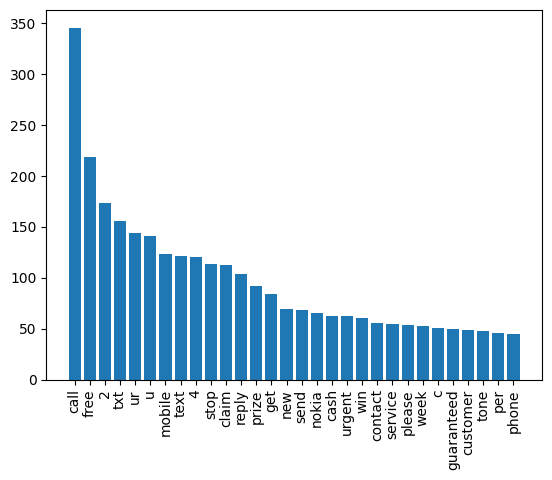

In [195]:
import seaborn as sns
# sns.barplot(pd.DataFrame(Counter(spam_count).most_common(30))[0],pd.DataFrame(Counter(spam_count).most_common(30))[0])
plt.bar(pd.DataFrame(Counter(spam_count).most_common(30))[0],pd.DataFrame(Counter(spam_count).most_common(30))[1])
plt.xticks(rotation='vertical');

In [196]:
ham_count=[]
for msg in df[df['target']==0]['summary_text'].tolist():
  for word in msg.split():
    ham_count.append(word)

In [197]:
len(ham_count)

38221

In [198]:
Counter(ham_count).most_common(30)

[('u', 979),
 ('gt', 318),
 ('lt', 316),
 ('get', 301),
 ('2', 300),
 ('go', 248),
 ('ok', 245),
 ('got', 242),
 ('ur', 237),
 ('know', 236),
 ('like', 231),
 ('call', 230),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('love', 191),
 ('day', 185),
 ('going', 169),
 ('one', 167),
 ('want', 163),
 ('4', 163),
 ('lor', 162),
 ('home', 161),
 ('sorry', 156),
 ('need', 155),
 ('da', 149),
 ('still', 148),
 ('n', 139),
 ('see', 139),
 ('later', 135)]

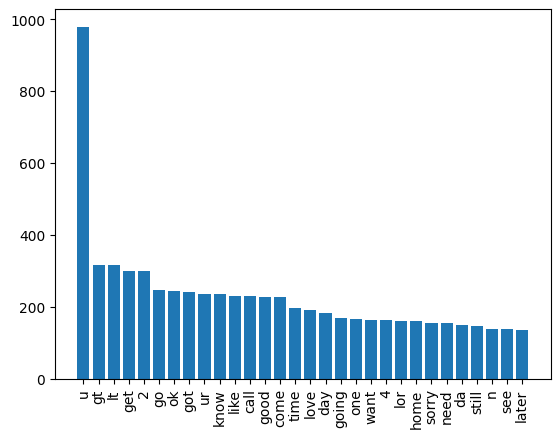

In [199]:
plt.bar(pd.DataFrame(Counter(ham_count).most_common(30))[0],pd.DataFrame(Counter(ham_count).most_common(30))[1])
plt.xticks(rotation='vertical');

In [200]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [201]:
x=tfidf.fit_transform(df['summary_text']).toarray()

In [202]:
x.shape

(5572, 8002)

In [203]:
y = df.target.values

In [204]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [206]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [207]:
from sklearn.metrics import accuracy_score,precision_score
y_pred=mnb.predict(x_test)

# Accuracy_score

In [208]:
accuracy_score(y_test,y_pred)

0.9641255605381166

# Precision_score

In [209]:
precision_score(y_test,y_pred)

1.0

## Example

In [223]:
msg = "The marks shown here may not reflect the same as in the GTU marksheet if GTU considers 12 marks only for the remedial exam"
lb.inverse_transform(mnb.predict(tfidf.transform([msg])))[0]

'ham'

In [224]:
msg = "Congratulations! You have been selected as one of our valued customers to receive an exclusive offer. This is a limited-time opportunity that you don't want to miss!We are delighted to offer you a special discount of 50% off on our premium products. Whether you're looking for the latest gadgets, fashionable accessories, or luxury items, we have it all! Act now to take advantage of this incredible offer. Simply click the link below to browse our exclusive collection and make your purchase:"
lb.inverse_transform(mnb.predict(tfidf.transform([msg])))[0]

'spam'